## 1. Convert Raw Data into Dataframe

In [1]:
#Install packages if needed
#! pip install --user --upgrade statsmodels.api
#! pip install --user --upgrade scipy

In [2]:
#Import necessary modules
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive, Layout

In [3]:
os.getcwd()

'/home/waikchan/groupdata/pythonballers'

In [4]:
#Check if the file is in the path, and load it if it is
if os.path.isfile("nba_dataset.csv"):
    df = pd.read_csv("nba_dataset.csv")
else:
    print("File not found!")

In [5]:
#Check if the file is in the path, and load it if it is
if os.path.isfile("NBA_kaggle.csv"):
    df2 = pd.read_csv("NBA_kaggle.csv")
else:
    print("File not found!")
df2

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [6]:
#Cleaning dataset #2
df2 = df2[["player_name", "age", "player_height", "player_weight", "season"]] #restricting to needed columns
df2 = df2[(df2.season == "2018-19")]
df2 = df2.rename(columns={"player_name": "Player"})
df2 

,Player,age,player_height,player_weight,season
10101,Gary Payton II,26.0,190.50,86.182480,2018-19
10102,Isaiah Briscoe,23.0,190.50,97.522280,2018-19
10103,Goran Dragic,33.0,190.50,86.182480,2018-19
10104,Glenn Robinson III,25.0,198.12,100.697424,2018-19
10105,Gerald Green,33.0,200.66,92.986360,2018-19
...,...,...,...,...,...
10626,Abdel Nader,25.0,198.12,102.058200,2018-19
10627,Aaron Holiday,22.0,185.42,83.914520,2018-19
10628,Aaron Gordon,23.0,205.74,99.790240,2018-19
10629,Alec Burks,27.0,198.12,97.068688,2018-19


In [7]:
df = df[(df.MP > 500)] # Only include players who have played more than 500 minutes in a season
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Ivica Zubac,C,21,TOT,59,37,1040,212,379,...,0.802,115,247,362,63,14,51,70,137,525
1,2,Ante Žiži?,C,22,CLE,59,25,1082,183,331,...,0.705,108,212,320,53,13,22,61,113,459
3,4,Cody Zeller,C,26,CHO,49,47,1243,190,345,...,0.787,110,223,333,102,38,41,62,164,497
6,7,Hassan Whiteside,C,29,MIA,72,53,1674,388,680,...,0.449,257,560,817,56,46,136,97,192,887
9,10,Nikola Vu?evi?,C,28,ORL,80,80,2510,701,1354,...,0.789,224,736,960,307,81,89,159,157,1665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Seth Curry,SG,28,POR,74,2,1399,212,465,...,0.846,27,93,120,66,36,12,61,97,581
496,497,Jamal Crawford,SG,38,PHO,64,0,1211,174,438,...,0.845,8,77,85,229,33,12,99,75,508
497,498,Allen Crabbe,SG,26,BRK,43,20,1133,137,373,...,0.732,16,132,148,46,23,13,46,102,413
498,499,Pat Connaughton,SG,26,MIL,61,2,1261,163,350,...,0.725,61,197,258,122,33,25,33,81,421


In [8]:
df = df.dropna()
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,4,Cody Zeller,C,26,CHO,49,47,1243,190,345,...,0.787,110,223,333,102,38,41,62,164,497
6,7,Hassan Whiteside,C,29,MIA,72,53,1674,388,680,...,0.449,257,560,817,56,46,136,97,192,887
9,10,Nikola Vu?evi?,C,28,ORL,80,80,2510,701,1354,...,0.789,224,736,960,307,81,89,159,157,1665
10,11,Jonas Valan?i?nas,C,26,TOT,49,27,1091,301,538,...,0.795,106,313,419,70,19,53,90,146,763
12,13,Myles Turner,C,22,IND,74,74,2119,380,780,...,0.736,101,430,531,115,60,199,100,195,984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Seth Curry,SG,28,POR,74,2,1399,212,465,...,0.846,27,93,120,66,36,12,61,97,581
496,497,Jamal Crawford,SG,38,PHO,64,0,1211,174,438,...,0.845,8,77,85,229,33,12,99,75,508
497,498,Allen Crabbe,SG,26,BRK,43,20,1133,137,373,...,0.732,16,132,148,46,23,13,46,102,413
498,499,Pat Connaughton,SG,26,MIL,61,2,1261,163,350,...,0.725,61,197,258,122,33,25,33,81,421


In [9]:
df.index = range(len(df))
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,4,Cody Zeller,C,26,CHO,49,47,1243,190,345,...,0.787,110,223,333,102,38,41,62,164,497
1,7,Hassan Whiteside,C,29,MIA,72,53,1674,388,680,...,0.449,257,560,817,56,46,136,97,192,887
2,10,Nikola Vu?evi?,C,28,ORL,80,80,2510,701,1354,...,0.789,224,736,960,307,81,89,159,157,1665
3,11,Jonas Valan?i?nas,C,26,TOT,49,27,1091,301,538,...,0.795,106,313,419,70,19,53,90,146,763
4,13,Myles Turner,C,22,IND,74,74,2119,380,780,...,0.736,101,430,531,115,60,199,100,195,984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,496,Seth Curry,SG,28,POR,74,2,1399,212,465,...,0.846,27,93,120,66,36,12,61,97,581
323,497,Jamal Crawford,SG,38,PHO,64,0,1211,174,438,...,0.845,8,77,85,229,33,12,99,75,508
324,498,Allen Crabbe,SG,26,BRK,43,20,1133,137,373,...,0.732,16,132,148,46,23,13,46,102,413
325,499,Pat Connaughton,SG,26,MIL,61,2,1261,163,350,...,0.725,61,197,258,122,33,25,33,81,421


In [10]:
df2 = df2.dropna()

In [11]:
#Inner join between df and df2 on "Player"
df = pd.merge(df, df2, on="Player")
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,age,player_height,player_weight,season
0,4,Cody Zeller,C,26,CHO,49,47,1243,190,345,...,102,38,41,62,164,497,26.0,213.36,108.862080,2018-19
1,7,Hassan Whiteside,C,29,MIA,72,53,1674,388,680,...,56,46,136,97,192,887,30.0,213.36,120.201880,2018-19
2,13,Myles Turner,C,22,IND,74,74,2119,380,780,...,115,60,199,100,195,984,23.0,210.82,113.398000,2018-19
3,14,Karl-Anthony Towns,C,23,MIN,77,77,2545,681,1314,...,259,67,125,240,292,1880,23.0,213.36,112.490816,2018-19
4,16,Daniel Theis,C,26,BOS,66,2,908,146,266,...,68,21,42,33,161,374,27.0,203.20,110.222856,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,496,Seth Curry,SG,28,POR,74,2,1399,212,465,...,66,36,12,61,97,581,28.0,187.96,83.914520,2018-19
293,497,Jamal Crawford,SG,38,PHO,64,0,1211,174,438,...,229,33,12,99,75,508,39.0,195.58,83.914520,2018-19
294,498,Allen Crabbe,SG,26,BRK,43,20,1133,137,373,...,46,23,13,46,102,413,27.0,198.12,96.161504,2018-19
295,499,Pat Connaughton,SG,26,MIL,61,2,1261,163,350,...,122,33,25,33,81,421,26.0,193.04,94.800728,2018-19


# 2. Data Analysis
### Question 1: What is the optimal height/weight ratio (in terms of shooting percentage)? 

In [12]:
df['height_weight'] = df['player_height'] / df['player_weight']  #creates height:weight ratio column

### Height/Weight Ratio vs Points

In [13]:
# Creates widget to select postion
w_size1 = widgets.ToggleButtons(  #widget type is toggle button
    description='Position:',
    options= ['All'] + ['C', 'SG', 'SF', 'PG', 'PF'],  # options for position selection
    value= 'All'  #default value is all positions
)
# function to Define function 
def view(graph):
    if w_size1.value == "All":      #condition for widget "all" positions selection                   
        df_tmp1 = df                #selects entire dataframe without restrictions                    
    else:                                                
        df_tmp1 = df[df.Pos == w_size1.value] #limits dataframe to positions selected in widget
        
    title = "Height/Weight Ratio vs Points for {} Position".format(w_size1.value) #creates title for graph
    df_tmp1.plot(kind='scatter', x='height_weight', y= "PTS", title=title, figsize=(10,10))  #graph creation of height:weight ratio and total PTS, depending on widget
    print(spearmanr(df_tmp1.height_weight, df_tmp1.PTS)) #spearman correlation 
  

i = interactive(view, graph=w_size1) #creates interactive view
display(i) #displays interactive view

interactive(children=(ToggleButtons(description='Position:', options=('All', 'C', 'SG', 'SF', 'PG', 'PF'), val…

### Height vs Points

In [14]:
# Creates widget to select postion
w_size2 = widgets.ToggleButtons( #widget type is toggle button
    description='Position:',
    options= ['All'] + ['C', 'SG', 'SF', 'PG', 'PF'],  # options for position selection
    value= 'All'  #default value is all positions
)
# function to Define function 
def view(graph):
    if w_size2.value == "All":  #condition for widget "all" positions selection                          
        df_tmp2 = df            #selects entire dataframe without restrictions                          
    else:                                                
        df_tmp2 = df[df.Pos == w_size2.value]   #limits dataframe to positions selected in widget
        
    title = "Height vs Points for {} Position".format(w_size2.value) #creates title for graph
    df_tmp2.plot(kind='scatter', x='player_height', y= "PTS", title=title, figsize=(10,10)) #graph creation of height and total PTS, depending on widget
    print(spearmanr(df_tmp2.player_height, df_tmp2.PTS))  #spearman correlation 
  

i = interactive(view, graph=w_size2)   #creates interactive view
display(i)  #displays interactive view

interactive(children=(ToggleButtons(description='Position:', options=('All', 'C', 'SG', 'SF', 'PG', 'PF'), val…

### Weight vs Points

In [15]:
# Creates widget to select postion
w_size = widgets.ToggleButtons(   #widget type is toggle button
    description='Position:',
    options= ['All'] + ['C', 'SG', 'SF', 'PG', 'PF'],  # options for position selection
    value= 'All'  #default value is all positions
)
# function to Define function 
def view(graph):
    if w_size.value == "All":     #condition for widget "all" positions selection                     
        df_tmp = df               #selects entire dataframe without restrictions                       
    else:                                                
        df_tmp = df[df.Pos == w_size.value]     #limits dataframe to positions selected in widget
        
    title = "Weight vs Points for {} Position".format(w_size.value)  #creates title for graph
    df_tmp.plot(kind='scatter', x='player_weight', y= "PTS", title=title, figsize=(10,10))  #graph creation of height and total PTS, depending on widget
    print(spearmanr(df_tmp.player_weight, df_tmp.PTS))  #spearman correlation 
  

i = interactive(view, graph=w_size)   #creates interactive view
display(i)   #displays interactive view

interactive(children=(ToggleButtons(description='Position:', options=('All', 'C', 'SG', 'SF', 'PG', 'PF'), val…

In [16]:
posL = list(pd.unique(df["Pos"])) #List of positions
posL.insert(0,"All") #Check all positions, too
phys = ["player_height", "player_weight", "height_weight"] #Physical attributes

#Perform the regression between points and each phsyical attribute
#for each position
for i in posL:
    for j in phys:
        if(i == "All"):
            dfReg = df
        else:
            dfReg = df[df.Pos == i]
        x = dfReg[j]
        x = sm.add_constant(x)
        y = dfReg["PTS"]
        model = sm.OLS(y,x).fit()
        print("For position:", i, "\n", model.summary(), "\n\n\n")

For position: All 
                             OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01718
Date:                Tue, 08 Dec 2020   Prob (F-statistic):              0.896
Time:                        20:02:22   Log-Likelihood:                -2243.9
No. Observations:                 297   AIC:                             4492.
Df Residuals:                     295   BIC:                             4499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           652.3574  

For position: PF 
                             OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3634
Date:                Tue, 08 Dec 2020   Prob (F-statistic):              0.549
Time:                        20:02:22   Log-Likelihood:                -456.23
No. Observations:                  61   AIC:                             916.5
Df Residuals:                      59   BIC:                             920.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1110.9386   

### Question 2: How does score vary among different positions?

In [17]:
#Find the mean scores for each position
scoresByPos = df.groupby("Pos", as_index=False).PTS.mean()
print(scoresByPos)

  Pos         PTS
0   C  753.612245
1  PF  684.475410
2  PG  742.250000
3  SF  692.000000
4  SG  804.627119


In [18]:
#Create an interactive radio button to display histograms of scores by positons

Uni = list(pd.unique(df["Pos"])) #Create a list of positions
Uni.insert(0,"All") #Add an "All" option
w = widgets.RadioButtons(options=Uni, description="Position:", value="All", disabled=False) #Make a radio button

plt.rcParams["figure.figsize"] = [12,6] #Set the figure size

#Function to make the histogram (reduce redundancy)
def MakeHist(x, title):
        plt.hist(x)
        plt.xlabel("Points")
        plt.ylabel("Frequency")
        plt.title("Points for All Positions")
        plt.show()

#Create view for interactive display
def view(Pos):
    if(Pos == "All"):
        dfPlot = df
        x = np.asarray(dfPlot["PTS"])
        title = "Points for All Positions"
        MakeHist(x, title)
    else:
        dfPlot = df[df.Pos == Pos]
        title = "Points for " + Pos
        x = np.asarray(dfPlot["PTS"])
        title = "Points for " + Pos
        MakeHist(x, title)
        
i = interactive(view, Pos=w)

display(i)

interactive(children=(RadioButtons(description='Position:', options=('All', 'C', 'PF', 'PG', 'SF', 'SG'), valu…

### Question 3: How do TRB, AST, STL, BLK,  and TOV affect FG%

In [19]:
# Create a correlation matrix to see how each statistic relates to the other
df[["FG%", "TRB", "AST", "STL", "BLK", "TOV"]].corr()

,FG%,TRB,AST,STL,BLK,TOV
FG%,1.000000,0.556741,0.000339,0.068950,0.497467,0.177708
TRB,0.556741,1.000000,0.293924,0.487438,0.710071,0.584314
AST,0.000339,0.293924,1.000000,0.670745,0.046479,0.838410
STL,0.068950,0.487438,0.670745,1.000000,0.275909,0.657840
BLK,0.497467,0.710071,0.046479,0.275909,1.000000,0.304108
TOV,0.177708,0.584314,0.838410,0.657840,0.304108,1.000000


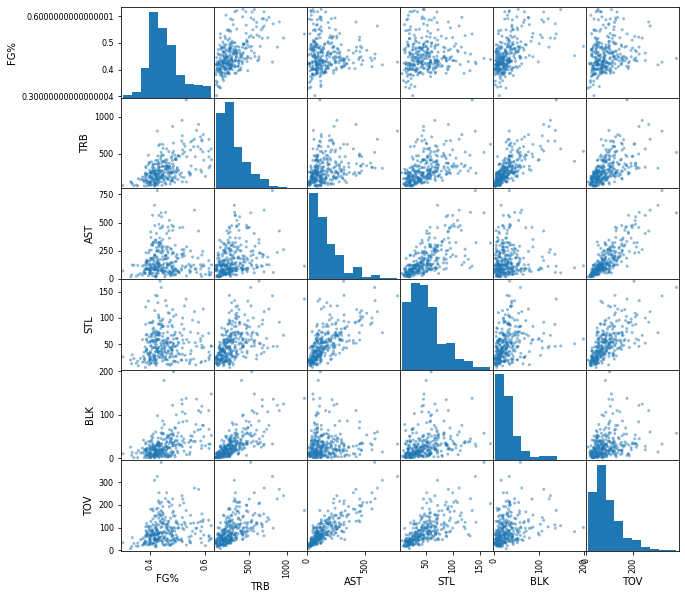

In [20]:
# Create a scatter matrix to compare statistics
pd.plotting.scatter_matrix(df[["FG%", "TRB", "AST", "STL", "BLK", "TOV"]], figsize=(10,10), diagonal="hist")
plt.show()

### Question 4: How does age correlate with shooting percentage?

[[ 1.         -0.03365304]
 [-0.03365304  1.        ]]


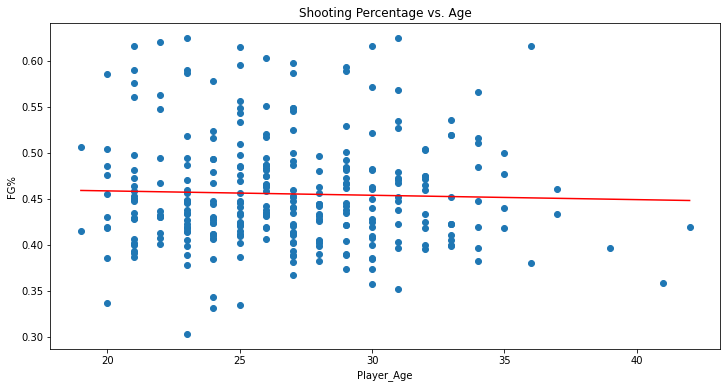

In [21]:
# define variables
x = df['age']
y = df['FG%']

#print correlation
print(np.corrcoef(x,y))

#creat scatterplot
plt.scatter(x,y)
plt.title('Shooting Percentage vs. Age')
plt.xlabel('Player_Age')
plt.ylabel('FG%')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color= 'red')
plt.show()

### Question 5: How do physical attributes correlate with shooting percentage?

[[1.         0.44876374]
 [0.44876374 1.        ]]


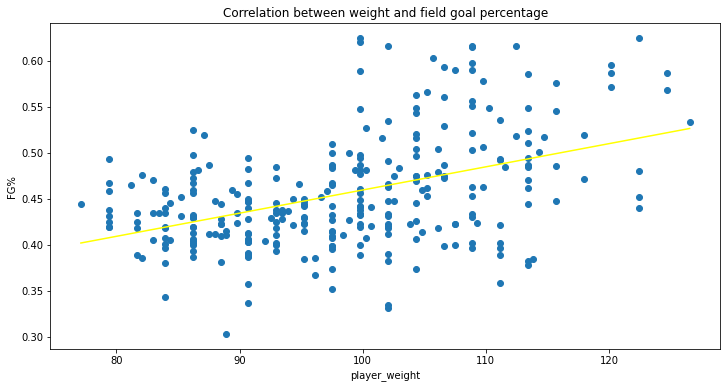

In [22]:
x = df['player_weight']
y = df['FG%']
print(np.corrcoef(x,y))   #calculcated the correlation between the variables
plt.scatter(x,y)
plt.title('Correlation between weight and field goal percentage')
plt.xlabel('player_weight')
plt.ylabel('FG%')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color='yellow')   #inserted trend line
plt.show()

[[1.        0.4854406]
 [0.4854406 1.       ]]


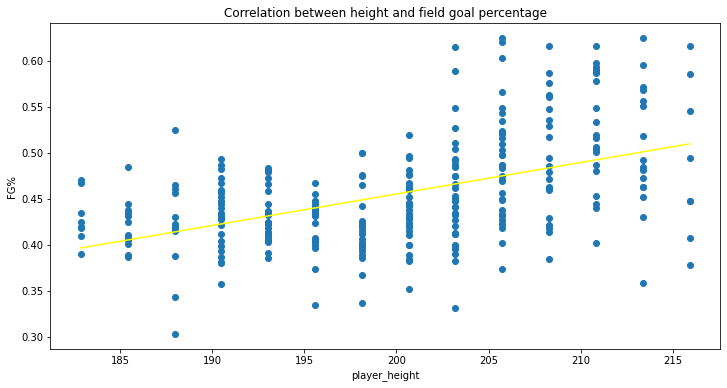

In [23]:
x = df['player_height']
y = df['FG%']
print(np.corrcoef(x,y))  
plt.scatter(x,y)
plt.title('Correlation between height and field goal percentage')
plt.xlabel('player_height')
plt.ylabel('FG%')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color='yellow')   
plt.show()

### Question 6: Find the mean score of each team.

In [24]:
#find average points made by team
avg_points_team = df.groupby("Tm", as_index=False).PTS.mean()
print(avg_points_team)

     Tm          PTS
0   ATL   823.375000
1   BOS   761.000000
2   BRK   692.769231
3   CHI   673.875000
4   CHO   735.545455
5   CLE   843.500000
6   DAL   543.142857
7   DEN   743.125000
8   DET   840.250000
9   GSW   769.750000
10  HOU  1041.833333
11  IND   742.222222
12  LAC   984.666667
13  LAL   754.888889
14  MEM   485.500000
15  MIA   740.500000
16  MIL   970.857143
17  MIN   690.000000
18  NOP   719.909091
19  NYK   525.250000
20  OKC   900.625000
21  ORL   697.888889
22  PHI   711.333333
23  PHO   570.555556
24  POR   804.444444
25  SAC  1023.833333
26  SAS   991.857143
27  TOR   936.875000
28  TOT   612.130435
29  UTA   741.555556
30  WAS   577.200000


### Question 7: Summary of All Statistics 

In [25]:
teamID = list(pd.unique(df["Tm"])) #creat a list of teams
teamID.insert(0, "All") #add "All" option

#widget dropdown
nba_team = widgets.Dropdown(
    description = 'Team:',
    options = teamID,
    value = "All",
    style = {"description_width": '50px'},
    layout = Layout(width = "15%")
)

#make interactive
def view(team):
    if team =="All":
        df_tmp = df
    else:
        df_tmp = df[df["Tm"] == team]
        
    title = "Stats of {}".format(team)
    df_tmp[["PTS", "TRB", "STL", "BLK", "TOV"]].plot(kind="box", title=title, grid=True, figsize=(15,7))
    
i = interactive(view, team = nba_team)
display(i)


interactive(children=(Dropdown(description='Team:', layout=Layout(width='15%'), options=('All', 'CHO', 'MIA', …